### Homework 5

### 2.

In [2]:
#python
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# load the data matrix X
d_jest = sio.loadmat('jesterdata.mat') 
X = d_jest['X']
# load known ratings y and true ratings truey
d_new = sio.loadmat('newuser.mat') 
y = d_new['y']
true_y = d_new['truey']
# total number of joke ratings should be m = 100, n = 7200
m, n = X.shape

# train on ratings we know for the new user
train_indices = np.squeeze(y != -99) 
num_train = np.count_nonzero(train_indices)

# test on ratings we don’t know
test_indices = np.logical_not(train_indices) 
num_test = m - num_train
X_data = X[train_indices , 0:20] 
y_data = y[train_indices]
y_test = true_y[test_indices]

##### a)

In [3]:
# solve for weights
w_hat = np.linalg.inv(X_data.T @ X_data) @ X_data.T @ y_data

For training set:

In [4]:
# compute predictions
y_hat_train = X_data @ w_hat
# measure performance on training jokes
avgerr_train = np.mean(y_hat_train - y_data)**2
print("Measure mean squared error with Forbenius norm of the 2 y vectors")
print("The average squared error rate among the 25 training data is:", avgerr_train)

Measure mean squared error with Forbenius norm of the 2 y vectors
The average squared error rate among the 25 training data is: 0.01468548269617467


Average l_2 error (train): 0.01468548269617467


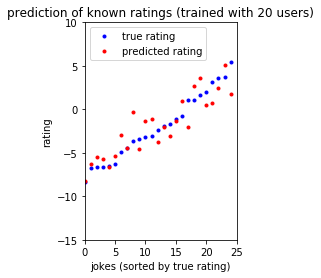

In [5]:
# display results
ax1 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data)) 
ax1.plot(range(num_train), y_data[sorted_indices], 'b.',range(num_train), y_hat_train[sorted_indices], 'r.' )

ax1.set_title('prediction of known ratings (trained with 20 users)')
ax1.set_xlabel('jokes (sorted by true rating)') 
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left') 
ax1.axis([0, num_train , -15, 10])
print("Average l_2 error (train):", avgerr_train)

In [6]:
# compute predictions
y_hat_test = X[test_indices, 0:20]  @ w_hat
# measure performance on training jokes
avgerr_test = np.mean(y_hat_test - y_test)**2
print("Measure mean squared error with Forbenius norm of the 2 y vectors")
print("The average squared error rate among the 75 testing data is:", avgerr_test)

Measure mean squared error with Forbenius norm of the 2 y vectors
The average squared error rate among the 75 testing data is: 0.5909702349228441


Average l_2 (test): 0.5909702349228441


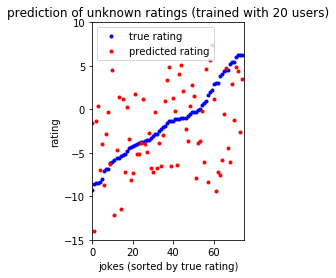

In [7]:
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test)) 
ax2.plot(range(num_test), y_test[sorted_indices], 'b.',range(num_test), y_hat_test[sorted_indices], 'r.' )
ax2.set_title('prediction of unknown ratings (trained with 20 users)')
ax2.set_xlabel('jokes (sorted by true rating)') 
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left') 
ax2.axis([0, num_test , -15, 10])
print("Average l_2 (test):", avgerr_test) 
plt.show()

In [8]:
y_hat_all = X[:, 0:20] @ w_hat

print("According to this least squared model made from the 25 * 20 training matrix, \
the new user's favorite joke should be the {}th one.".format(np.argmax(y_hat_all) + 1))
print("The prediction is not very accurate.")

According to this least squared model made from the 25 * 20 training matrix, the new user's favorite joke should be the 49th one.
The prediction is not very accurate.


##### b)

Now with the under-determined problem, we can apply unter-determined least squares method. Instead of calculating weights </p>
$\hat{w} = (X^T X)^{-1} X^T y$ </p>
we can compute: </p>
$\hat{w} = (X^T X)^{-1} X^T y$ </p>
$= V (\Sigma^T \Sigma)^{-1} \Sigma^T U^T y$</p>
$= V \Sigma^+ U^T y $ </p>
$= X^T (X X^T)^{-1} y$

In [9]:
# Using entire X matrix
X_data = X[train_indices, :] 
X_test = X[test_indices, :]
y_data = y[train_indices]
y_test = true_y[test_indices]

# solve for weights
w_hat = X_data.T @ np.linalg.inv(X_data @ X_data.T) @ y_data

Measure mean squared error with Forbenius norm of the 2 y vectors
The average squared error rate among the 25 training data is: 5.0334256133758186e-30
Average l_2 error (train): 5.0334256133758186e-30


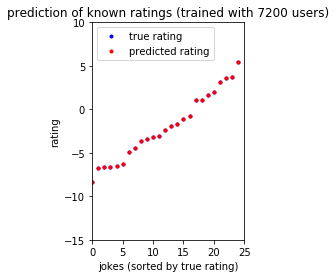

In [10]:
# Training set

# compute predictions
y_hat_train = X_data @ w_hat
# measure performance on training jokes
avgerr_train = np.mean((y_hat_train - y_data)**2)
print("Measure mean squared error with Forbenius norm of the 2 y vectors")
print("The average squared error rate among the 25 training data is:", avgerr_train)

# display results
ax3 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data)) 
ax3.plot(range(num_train), y_data[sorted_indices], 'b.',range(num_train), y_hat_train[sorted_indices], 'r.' )

ax3.set_title('prediction of known ratings (trained with 7200 users)')
ax3.set_xlabel('jokes (sorted by true rating)') 
ax3.set_ylabel('rating')
ax3.legend(['true rating', 'predicted rating'], loc='upper left') 
ax3.axis([0, num_train , -15, 10])
print("Average l_2 error (train):", avgerr_train)

Measure mean squared error with Forbenius norm of the 2 y vectors
The average squared error rate among the 75 testing data is: 12.21052375094273
Average l_2 (test): 12.21052375094273


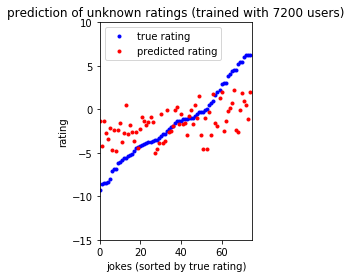

In [11]:
# Testing set

# compute predictions
y_hat_test = X_test  @ w_hat
# measure performance on training jokes
avgerr_test = np.mean((y_hat_test - y_test)**2)
print("Measure mean squared error with Forbenius norm of the 2 y vectors")
print("The average squared error rate among the 75 testing data is:", avgerr_test)

# display results
ax4 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test)) 
ax4.plot(range(num_test), y_test[sorted_indices], 'b.',range(num_test), y_hat_test[sorted_indices], 'r.' )
ax4.set_title('prediction of unknown ratings (trained with 7200 users)')
ax4.set_xlabel('jokes (sorted by true rating)') 
ax4.set_ylabel('rating')
ax4.legend(['true rating', 'predicted rating'], loc='upper left') 
ax4.axis([0, num_test , -15, 10])
print("Average l_2 (test):", avgerr_test) 
plt.show()

It seems that with all 7200 user in the training, there will be a overfitting problem in training data, and a fairly large average error rate in our prediction.

##### c)

In this problem, we consider the new user (with ratings true_y) to be a linear combination of other 7200 users. The weight vector w_hat describes the relations between the new user and the other 7200 users. </p>

To find the best user(s) to predict new user's ratings, we need to check the largest weight(s) in weight vector, which indicates the most important user(s) for our prediction.

Find the best 1 user:

In [12]:
idx1 = np.argmax(abs(w_hat))
w1 = w_hat[idx1]
x1 = X[:, idx1]
pred = x1 * w1
print("The index of the user is {}, it's the {}th user in our matrix. Their weight is {}".format(
    idx1, idx1+1, w1[0]
))

The index of the user is 2502, it's the 2503th user in our matrix. Their weight is -0.002516200650573655


In [13]:
# Using the best one user
X_data = X[train_indices, idx1] 
X_test = X[test_indices, idx1]
y_data = y[train_indices]
y_test = true_y[test_indices]

y_hat_train = X_data * w1
avgerr_train = np.mean((y_hat_train - y_data)**2)

y_hat_test = X_test * w1
avgerr_test = np.mean((y_hat_test - y_test)**2)

print("Using one best user for prediction, the average training error rate is {}, the \
average testing error rate is {}.".format(avgerr_train, avgerr_test))


Using one best user for prediction, the average training error rate is 18.480811027813704, the average testing error rate is 19.57068332723278.


Find the best 2 users:

In [14]:
idx1, idx2 = np.argpartition(abs(w_hat).flatten(), -2)[-2:]

x1_train = X[train_indices,idx1]
x2_train = X[train_indices,idx2]
x1_test = X[test_indices, idx1]
x2_test = X[test_indices, idx2]
w1 = w_hat[idx1]
w2 = w_hat[idx2]

y_hat_train = x1_train * w1 + x2_train * w2
avgerr_train = np.mean((y_hat_train - y_data)**2)

y_hat_test = X_test * w1 + x2_test * w2
avgerr_test = np.mean((y_hat_test - y_test)**2)

print("Using one best user for prediction, the average training error rate is {}, the \
average testing error rate is {}.".format(avgerr_train, avgerr_test))

Using one best user for prediction, the average training error rate is 18.489543196947313, the average testing error rate is 19.5646272106615.


There is some slight change in averate squared error in training and testing sets.

##### d)

Average l_2 (test): 19.5646272106615


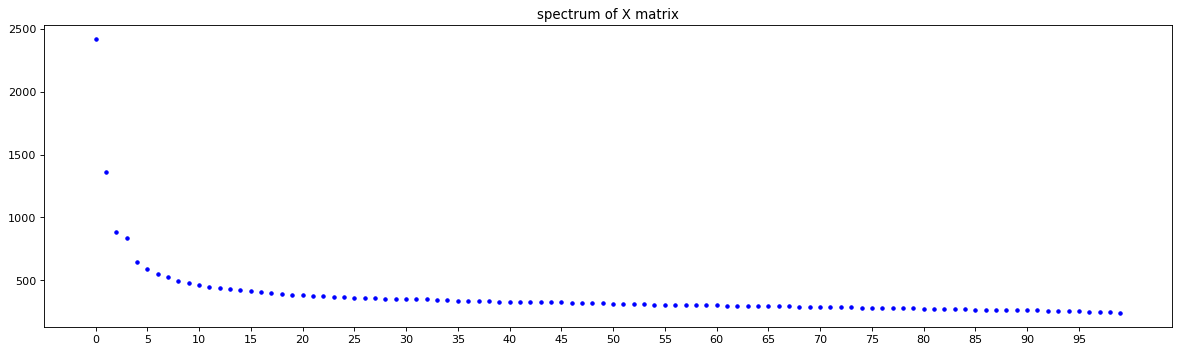

In [15]:
u, sigma, v_h = np.linalg.svd(X, full_matrices=False)

# display results
from matplotlib.pyplot import figure
figure(figsize=(40, 5), dpi=80)
ax5 = plt.subplot(122)
ax5.plot(range(len(sigma)), sigma, 'b.')
ax5.set_title('spectrum of X matrix')
ax2.set_ylabel('singular value')
ax2.axis([0, num_test , -15, 10])
plt.xticks(np.arange(0,sigma.shape[0], 5))
print("Average l_2 (test):", avgerr_test) 
plt.show()

The rank of X is 100. There is no singular value equal to 0, meaning X is a full-rank matrix. </p>
4 dimensions seem to be important. The first 4 signular values are significantly larger than the rest, and since the 5th singular value, the rest of them have very little variation. We could choose the first 4 singular values to compute the prediction. </p>
This tells us that some user's ratings on these jokes can be viewed as a linear combination of the 4 "typical users". In other words, with the 4 most important users, we can explain most of the users' joke tastes.

##### e)

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

u, sigma, v_h = np.linalg.svd(X, full_matrices=False)

X_centered = X - np.mean(X,axis=0)
u, sigma, v_t = np.linalg.svd(X_centered, full_matrices = False)

# Use U and sigma to explain the data in the three most important directions
S = np.diag(sigma)
PC_3 = (u@S)[:, 0:3]

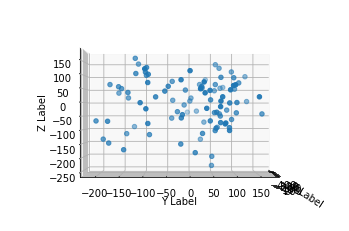

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(PC_3[:,0], PC_3[:,1], PC_3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

elevation = 0
azimuth = 0

ax.view_init(elev=elevation, azim=azimuth)

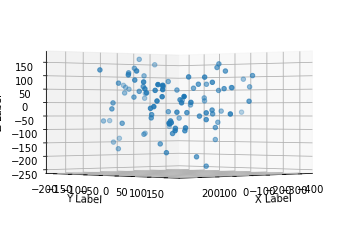

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(PC_3[:,0], PC_3[:,1], PC_3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

elevation = 0
azimuth = 45

ax.view_init(elev=elevation, azim=azimuth)

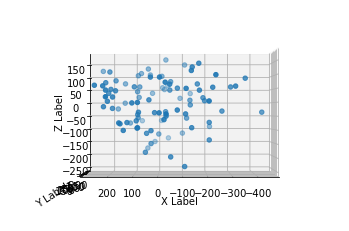

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(PC_3[:,0], PC_3[:,1], PC_3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

elevation = 0
azimuth = 90

ax.view_init(elev=elevation, azim=azimuth)

The projection is inside a 3-d space. Each data is projected as a point inside the space, with three dimensions each representing the relation between the user represented by the data and the 3 "important" users. By checking each point's x, y and z coordinates, we can get the coefficients and understand how this user is represented by the 3 important users.</p> 
With this model, we can simulate the user's ratings on different jokes based on the coordinates and the ratings of the 3 important users.

##### f)

With power method, we start with the initial guess of $\pi$, the "eigenvector" of $A = X X^T$, which is the first left singular vector of X. The first “eigenvalue” of A is the squared first singular value $\sigma^2$. </p>
As we iterate, we keep applying the matrix A to the old "guessed eigenvector" $\pi$, normalizing the result and defining it as the new $\pi$. </p>
Eventually the difference between $\pi^(k-1)$ and $\pi^(k)$ will pass a threshold $\epsilon$, and we will get the final estimate of the eigenvector of $A$

In [20]:
def power_iteration(A, num_iterations, ep=None):

    pi = np.random.rand(A.shape[1])

    for _ in range(num_iterations):
        A_pi = np.dot(A, pi)
        new_pi = A_pi / np.linalg.norm(A_pi)

        if ep:
            if np.linalg.norm(pi - new_pi) < ep:
                return new_pi

        pi = new_pi
        
    return pi

In [21]:
A = X @ X.T
B = X.T @ X

left_ev = power_iteration(A, 50)
right_ev = power_iteration(B, 50)

u, s, v_h = np.linalg.svd(X)

if np.allclose(abs(u[:, 0]), abs(left_ev)):
    print("The 1st left singular column is the same as result from Power Iteration")
if np.allclose(abs(v_h[0, :]), abs(right_ev)):
    print("The 1st right singular column is the same as result from Power Iteration")

The 1st left singular column is the same as result from Power Iteration
The 1st right singular column is the same as result from Power Iteration


g)

The power iteration method starts with one vector, and for each step it uses $A = X X^T$ to move the vector closer to the real eigenvector. This requires that the starting vector is somewhat proportional to the 

### 3.

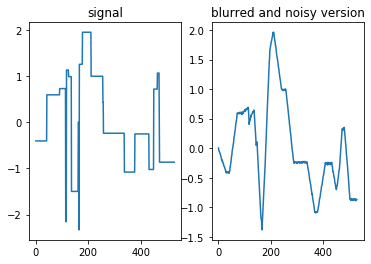

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def blur(k=30, sigma=0.01):
    
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))

    return X, y, w

X, y, w = blur()

# plot
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('signal')
ax1.plot(w)
ax2.set_title('blurred and noisy version')
ax2.plot(y[0:n])

plt.show()


##### a)

In [99]:
# standard least squares
w_lsq = np.linalg.inv(X.T @ X) @ X.T @ y
avgerr = np.mean((w_lsq - w)**2)

print("The average squared error of Standard Least Squares method is", avgerr)

The average squared error of Standard Least Squares method is 0.6811427900235643


In [102]:
# truncated SVD
k = 30

k_vals = [i for i in range(1, 5)]

def truncated_svd(X, k, y):
    '''
    compute truncated SVD
    '''
    u, s, vh = np.linalg.svd(X)
    sigma = np.diag(s[:k])
    # build projection matrix P
    P = u[:, :k] @ sigma @ vh[:k, :]
    w_hat = np.linalg.inv(P.T @ P) @ P.T @ y

    return w_hat

errs = {}
for k in k_vals:
    w_hat = truncated_svd(X, k, y)
    avgerr = np.mean((w_hat - w) ** 2)
    errs[k] = avgerr

print("The best k value from 1 to 4 is", min(errs, key=errs.get))
print("The mean squared error is", min(errs.values()))


The best k value from 1 to 4 is 1
The mean squared error is 813192438.8024781


In [103]:
from numpy.linalg import inv
from numpy.linalg import svd

def ridge(X, y, lam):
    u, s, vh = svd(X, full_matrices=False)
    p = len(s)
    sigma = np.diag(s)
    I = np.identity(p)
    w_hat = vh.T @ inv(sigma.T @ sigma + lam * I) @ sigma.T @ u.T @ y
    return w_hat

lam = 1
w_hat = ridge(X, y, lam)
avg_err = np.mean((w_hat - w)**2)
print("The average error from ridge regression is", avg_err)

The average error from ridge regression is 0.38195551263931066


##### b)

In [116]:

def best_reg_pram(X, y, w):
    min_err = None
    for lam in [0.01, 0.1, 0.5, 1, 2, 4, 5]:
        w_hat = ridge(X, y, lam)
        avg_err = np.mean((w_hat - w)**2)
        if min_err:
            if min_err > avg_err:
                min_err = avg_err
                best_lam = lam
        else:
            min_err = avg_err
            best_lam = lam
    return best_lam


optimal_lams = []
for k in range(5,41,5):
    X, y, w = blur(k, 0.01)
    best_lam = best_reg_pram(X, y, w)
    optimal_lams.append(best_lam)
    

KeyboardInterrupt: 

In [104]:
range(1,30,2)

range(1, 30, 2)